In [5]:
import os
import json
import matplotlib.pyplot as plt
import numpy as np
from pprint import pprint

In [17]:
dir = '/home/laetitia/work/OpenELM/logs/compute_pp_archive_train'
os.getcwd()

'/home/laetitia/work/OpenELM/analysis_P3/quality'

In [18]:
puzzles_train = json.load(open(os.path.join(dir, 'puzzles_train_compute_pp.json'), 'r'))
puzzles_test = json.load(open(os.path.join(dir, 'puzzles_test_compute_pp.json'), 'r'))
puzzles_ELM_NLP = json.load(open(os.path.join(dir, 'puzzles_ELM_NLP_0_compute_pp.json'), 'r'))
puzzles_ACES_smart = json.load(open(os.path.join(dir, 'puzzles_ACES_smart_0_compute_pp.json'), 'r'))
puzzles_rd_gen = json.load(open(os.path.join(dir, 'puzzles_rd_gen_0_compute_pp.json'), 'r'))

In [38]:
len(puzzles_train) + len(puzzles_rd_gen) + len(puzzles_ACES_smart) + len(puzzles_ELM_NLP)

4138

In [48]:
len(puzzles_rd_gen) + len(puzzles_ACES_smart) + len(puzzles_ELM_NLP)

3562

In [47]:
len([p for p in cpp if 'emb' in p])

3562

In [42]:
puzzles_rd_gen[123]['name']

'RdGen_123:0'

In [51]:
with open(os.path.join(dir, 'compute_pp.json'), 'r') as f:
    cpp = json.load(f)
print(len(cpp))

5277


KeyError: 'origin'

In [52]:
for p in puzzles_ACES_smart:
    p['origin'] = 'aces'
for p in puzzles_ELM_NLP:
    p['origin'] = 'elm'
for p in puzzles_rd_gen:
    p['origin'] = 'rd_gen'
for p in puzzles_train:
    p['origin'] = 'train'
for p in puzzles_test:
    p['origin'] = 'test'

In [50]:
with open('/home/laetitia/work/OpenELM/logs/compute_pp_archive_train/dataset.json', 'w') as f:
    json.dump(puzzles_train + puzzles_rd_gen + puzzles_ELM_NLP + puzzles_ACES_smart, f)

In [3]:
# label dataset with the right names
dataset_path = '/home/laetitia/work/code-eval/data/dataset.json'
ds = json.load(open(dataset_path, 'r'))

In [20]:
pprint(list(ds[1000].keys()))

['fitness',
 'program_str',
 'emb',
 'explanation_emb',
 'idx_generation',
 'target_skills',
 'puzzle_history',
 'problem_func',
 'solution_func',
 'quality',
 'description',
 'is_valid',
 'is_valid_explanation',
 'fitnessPP',
 'final_losses']


In [22]:
ds[1000]['explanation_emb']

'The puzzle involves string manipulation and set operations.'

In [23]:
ds[1000]['description']

[['The puzzle requires students to define a function f(s: str) that checks if a certain condition is met, and a function g() that generates a string based on a mathematical operation and finds a substring with the highest count in the generated string. The assertion checks if f(g()) returns True.']]

In [26]:
ds[3000]['idx_generation']

77

In [10]:
ds[0]['program_str']

'def f(s: str, strings=[\'thythanaham\', \'quiroxebadivogis\', \'kyh\', \'xa\', \'gathytyjonymihahahy\', \'musyzisequyxyhenico\', \'poxizitizexokigewifi\', \'mife\', \'chyjuratexta\', \'gyrato\']):\n    """Find the reversed version of the alphabetically second string in a list."""\n    return s[::-1] in strings and sum(t < s[::-1] for t in strings) == 1\ndef g(strings=[\'thythanaham\', \'quiroxebadivogis\', \'kyh\', \'xa\', \'gathytyjonymihahahy\', \'musyzisequyxyhenico\', \'poxizitizexokigewifi\', \'mife\', \'chyjuratexta\', \'gyrato\']):\n    return sorted(strings)[1][::-1]\nassert f(g()) == True'

In [35]:
ds[282]['origin']

'puzzles_train.json'

In [36]:
# new_ds = []
# How to handle duplicates?
not_found_idx = []
for i, p in enumerate(ds):
    if 'name' in p:
        continue  # new_ds.append(p)
    else:
        for pp in puzzles_rd_gen:
            if pp['program_str'] == p['program_str']:  # and pp['description'] == p['description'] and pp['explanation_emb'] == p['explanation_emb']:
                continue  # p['name'] = pp['name']; new_ds.append(p)
        for pp in puzzles_ACES_smart:
            if pp['program_str'] == p['program_str']:  # and pp['description'] == p['description'] and pp['explanation_emb'] == p['explanation_emb']:
                continue  # p['name'] = pp['name']; new_ds.append(p)
        for pp in puzzles_ELM_NLP:
            if pp['program_str'] == p['program_str']:  # and pp['description'] == p['description'] and pp['explanation_emb'] == p['explanation_emb']:
                continue  # p['name'] = pp['name']; new_ds.append(p)
        print(f'Not found!!! Puzzle {i}')
        not_found_idx.append(i)

Not found!!! Puzzle 288
Not found!!! Puzzle 289
Not found!!! Puzzle 290
Not found!!! Puzzle 291
Not found!!! Puzzle 292
Not found!!! Puzzle 293
Not found!!! Puzzle 294
Not found!!! Puzzle 295
Not found!!! Puzzle 296
Not found!!! Puzzle 297
Not found!!! Puzzle 298
Not found!!! Puzzle 299
Not found!!! Puzzle 300
Not found!!! Puzzle 301
Not found!!! Puzzle 302
Not found!!! Puzzle 303
Not found!!! Puzzle 304
Not found!!! Puzzle 305
Not found!!! Puzzle 306
Not found!!! Puzzle 307
Not found!!! Puzzle 308
Not found!!! Puzzle 309
Not found!!! Puzzle 310
Not found!!! Puzzle 311
Not found!!! Puzzle 312
Not found!!! Puzzle 313
Not found!!! Puzzle 314
Not found!!! Puzzle 315
Not found!!! Puzzle 316
Not found!!! Puzzle 317
Not found!!! Puzzle 318
Not found!!! Puzzle 319
Not found!!! Puzzle 320
Not found!!! Puzzle 321
Not found!!! Puzzle 322
Not found!!! Puzzle 323
Not found!!! Puzzle 324
Not found!!! Puzzle 325
Not found!!! Puzzle 326
Not found!!! Puzzle 327
Not found!!! Puzzle 328
Not found!!! Puz

In [37]:
len(not_found_idx)

2979

In [19]:
puzzles_ELM_NLP[0]['program_str']

'def f(n: int) -> bool:\n    return str(n * n).startswith(\'123456789\')\ndef g():\n    return int(int("123456789" + "0" * 9) ** 0.5) + 1\nassert f(g()) == True'

In [11]:
puzzles_train = [p for p in puzzles_train if 'fitnessPP' in p]
puzzles_test = [p for p in puzzles_test if 'fitnessPP' in p]
puzzles_ELM_NLP = [p for p in puzzles_ELM_NLP if 'fitnessPP' in p]
puzzles_ACES_smart = [p for p in puzzles_ACES_smart if 'fitnessPP' in p]
puzzles_rd_gen = [p for p in puzzles_rd_gen if 'fitnessPP' in p]

NameError: name 'puzzles_train' is not defined

In [5]:
print(len(puzzles_train))
print(len(puzzles_test))
print(len(puzzles_ELM_NLP))
print(len(puzzles_ACES_smart))
print(len(puzzles_rd_gen))

576
1043
1330
389
1260


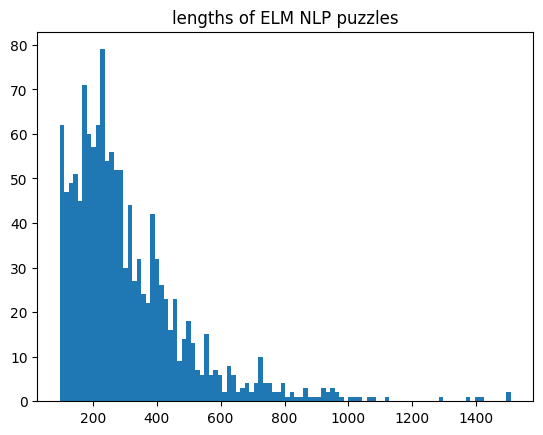

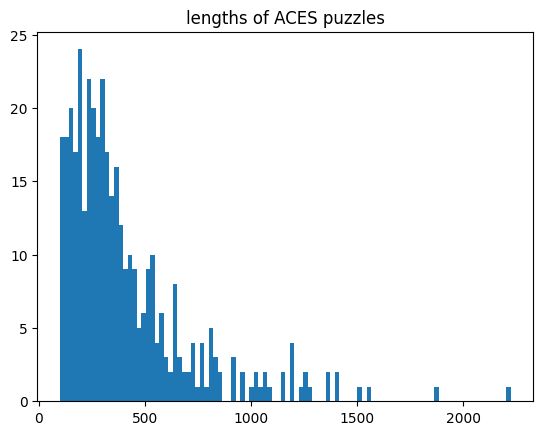

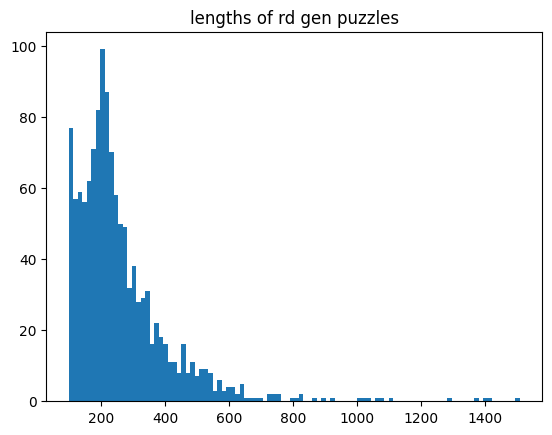

In [9]:
plt.hist([len(p['program_str']) for p in puzzles_ELM_NLP], bins=100)
plt.title('lengths of ELM NLP puzzles')
plt.show()
plt.hist([len(p['program_str']) for p in puzzles_ACES_smart], bins=100)
plt.title('lengths of ACES puzzles')
plt.show()
plt.hist([len(p['program_str']) for p in puzzles_rd_gen], bins=100)
plt.title('lengths of rd gen puzzles')
plt.show()

In [12]:
print(np.mean([len(p['program_str']) for p in puzzles_ELM_NLP]))
print(np.mean([len(p['program_str']) for p in puzzles_ACES_smart]))
print(np.mean([len(p['program_str']) for p in puzzles_rd_gen]))

309.46766917293235
409.9820051413882
262.68650793650795


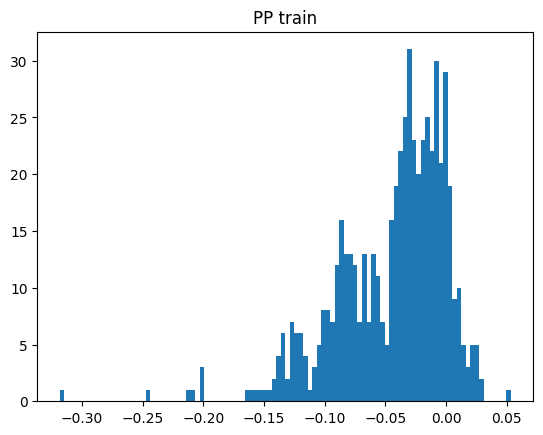

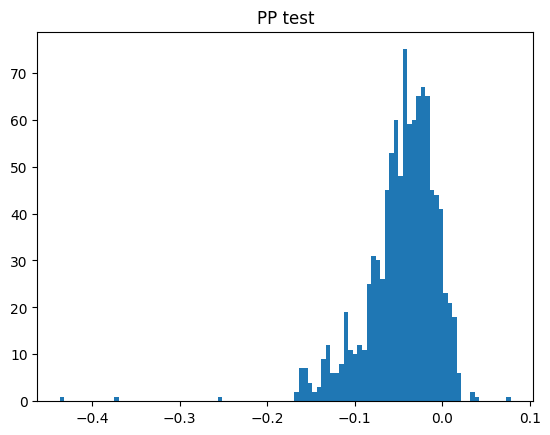

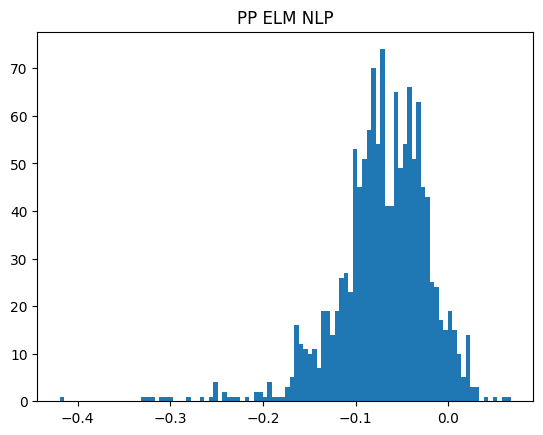

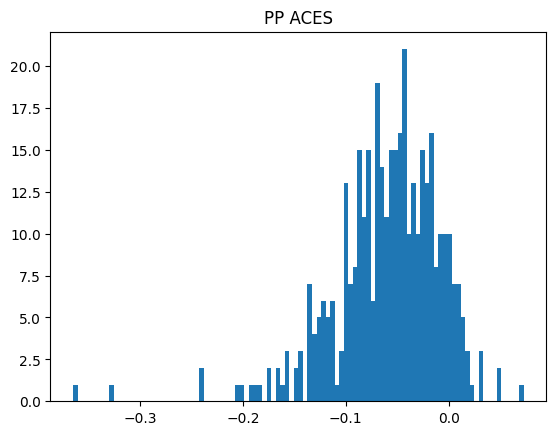

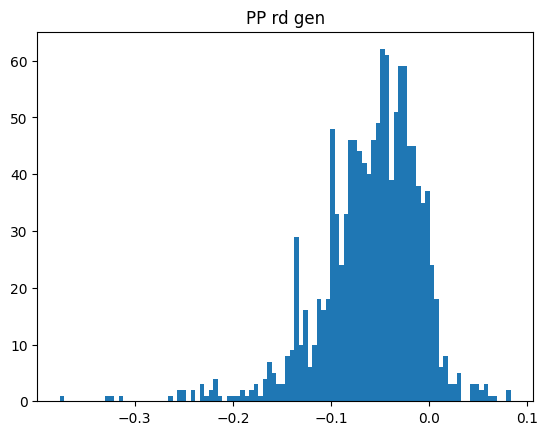

In [6]:
plt.hist([p['fitnessPP'] for p in puzzles_train], bins=100)
plt.title('PP train')
plt.show()
plt.hist([p['fitnessPP'] for p in puzzles_test], bins=100)
plt.title('PP test')
plt.show()
plt.hist([p['fitnessPP'] for p in puzzles_ELM_NLP], bins=100)
plt.title('PP ELM NLP')
plt.show()
plt.hist([p['fitnessPP'] for p in puzzles_ACES_smart], bins=100)
plt.title('PP ACES')
plt.show()
plt.hist([p['fitnessPP'] for p in puzzles_rd_gen], bins=100)
plt.title('PP rd gen')
plt.show()

In [14]:
puzzles_train_s = sorted(puzzles_train, key=lambda x: x['fitnessPP'])
puzzles_test_s = sorted(puzzles_test, key=lambda x: x['fitnessPP'])
puzzles_ELM_NLP_s = sorted(puzzles_ELM_NLP, key=lambda x: x['fitnessPP'])
puzzles_ACES_smart_s = sorted(puzzles_ACES_smart, key=lambda x: x['fitnessPP'])
puzzles_rd_gen_s = sorted(puzzles_rd_gen, key=lambda x: x['fitnessPP'])

In [15]:
for p in puzzles_train_s[:10]:
    print(p['fitnessPP'])
    print(p['sat'])
    print()
    print(p['sol_header'])
    print(p['sol_bodies'][0])

-0.318130224943161
def sat(n: int):
    return pow(2, n, n) == 3

def sol():
    return 4700063497
-0.24706895649433136
def sat(s: str):
    return sorted(s) == sorted('Permute me true') and s == s[::-1]

def sol():
    s = sorted('Permute me true'[1:])[::2]
    return "".join(s + ['P'] + s[::-1])
-0.21231822669506073
def sat(s_case: str, s="rAC"):
    caps = 0
    for c in s:
        if c != c.lower():
            caps += 1
    return s_case == (s.upper() if caps > len(s) // 2 else s.lower())

def sol(s="rAC"):
    caps = 0
    for c in s:
        if c != c.lower():
            caps += 1
    return (s.upper() if caps > len(s) // 2 else s.lower())  # duh, just take sat and return the answer checked for
-0.20715199410915375
def sat(s_case: str, s="KANExAjoHiBotipomyVOkATuMY"):
    caps = 0
    for c in s:
        if c != c.lower():
            caps += 1
    return s_case == (s.upper() if caps > len(s) // 2 else s.lower())

def sol(s="KANExAjoHiBotipomyVOkATuMY"):
    caps = 0
    for c 

In [16]:
for p in puzzles_train_s[-10:]:
    print(p['fitnessPP'])
    print(p['sat'])
    print()
    print(p['sol_header'])
    print(p['sol_bodies'][0])

0.02248486876487732
def sat(x: List[int], t=4545622399, n=1009):
    assert all([v > 0 for v in x])
    s = 0
    i = 0
    for v in sorted(x):
        s += v
        if s > t:
            return i == n
        i += 1
    return i == n

def sol(t=4545622399, n=1009):
    return [1] * n + [t]
0.023475736379623413
def sat(li: List[int], n=18):
    assert n % 3 == 0, "Hint: n is a multiple of 3"
    return len(li) == n and all(li[(i + 2) % n] == 1 + li[(i + 1) % n] * li[i] for i in range(n))

def sol(n=18):
    return [-1, -1, 2] * (n // 3)
0.024193625897169113
def sat(d: int, n=476988101965):
    return d > n and all(i in "47" for i in str(str(d).count("4") + str(d).count("7")))

def sol(n=476988101965):
    return int("4444" + "0" * (len(str(n)) - 3))
0.02438613772392273
def sat(x: List[int], t=4917027557, n=4815):
    assert all([v > 0 for v in x])
    s = 0
    i = 0
    for v in sorted(x):
        s += v
        if s > t:
            return i == n
        i += 1
    return i == n

de

In [17]:
dataset_low_fitness = []
dataset_high_fitness = []

In [18]:
dataset_low_fitness += puzzles_train_s[:len(puzzles_train_s)//2]
dataset_low_fitness += puzzles_ELM_NLP_s[:len(puzzles_ELM_NLP_s)//2]
dataset_low_fitness += puzzles_ACES_smart_s[:len(puzzles_ACES_smart_s)//2]
dataset_low_fitness += puzzles_rd_gen_s[:len(puzzles_rd_gen_s)//2]
dataset_high_fitness += puzzles_train_s[len(puzzles_train_s)//2:]
dataset_high_fitness += puzzles_ELM_NLP_s[len(puzzles_ELM_NLP_s)//2:]
dataset_high_fitness += puzzles_ACES_smart_s[len(puzzles_ACES_smart_s)//2:]
dataset_high_fitness += puzzles_rd_gen_s[len(puzzles_rd_gen_s)//2:]

In [25]:
import sys
sys.path.append('../../src/openelm/quality_metrics')

In [29]:
sys.path.remove('../..')

In [30]:
from utils import make_solution

ImportError: cannot import name 'make_solution' from 'utils' (/home/laetitia/work/OpenELM/analysis_P3/quality/../../utils.py)

In [31]:
def make_solution(puzzle):
    # chooses one solution among the available ones
    header = puzzle['sol_header'].replace('def sol(', 'def g(')
    # body = np.random.choice(puzzle['sol_bodies'])  # choose at random
    body = puzzle['sol_bodies'][0]  # choose the first one, ideal to get
    return '\n'.join([header, body])


def make_puzzle(puzzle, include_docstring=False):
    if include_docstring:
        splitlines = puzzle['sat'].split('\n')
        splitlines.insert(1, puzzle['sol_docstring'])
        puz_str = '\n'.join(splitlines)
    else:
        puz_str = puzzle['sat']
    return puz_str.replace('def sat(', 'def f(')


In [34]:
puzzles_ACES_smart[0].keys()

dict_keys(['fitness', 'program_str', 'emb', 'explanation_emb', 'idx_generation', 'target_skills', 'puzzle_history', 'problem_func', 'solution_func', 'quality', 'description', 'is_valid', 'is_valid_explanation', 'original_losses', 'fitnessPP', 'final_losses'])

In [39]:
puzzles_ELM_NLP[5]['description']

[['The puzzle requires the student to write a function that takes a list of integers and returns a boolean value based on a comparison with a given string. The solution function generates a list of integers based on the index of characters in another string.']]

In [40]:
for p in dataset_low_fitness:
    if 'program_str' not in p:
        puzzle = make_puzzle(p, include_docstring=True)
        solution = make_solution(p)
        p['program_str'] = f'{puzzle}\n{solution}\nassert f(g()) == True'
        p['description'] = [[p['sol_docstring']]]

for p in dataset_high_fitness:
    if 'program_str' not in p:
        puzzle = make_puzzle(p, include_docstring=True)
        solution = make_solution(p)
        p['program_str'] = f'{puzzle}\n{solution}\nassert f(g()) == True'
        p['description'] = [[p['sol_docstring']]]

In [42]:
json.dump(dataset_high_fitness, open('puzzles_high_fitness_archivetrain,json', 'w'))

In [43]:
json.dump(dataset_low_fitness, open('puzzles_low_fitness_archivetrain,json', 'w'))